In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import tensorflow as tf
import os

import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from random import shuffle
import cv2
import numpy as np
import pandas as pd

C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
#train = np.load("train_data.npy",allow_pickle = True)

In [51]:
#image_paths = 'E:/Drowsiness/Data_CNN/train/alert/'

def load_images_from_folder():
    img_size = 224
    images = []
    image_paths = 'E:/Drowsiness/Data_CNN/train/alert/'
    for filename in os.listdir(image_paths):
        img = cv2.imread(os.path.join(image_paths,filename))
        if img is not None:
            img = cv2.resize(img,(img_size,img_size))
            images.append([np.array(img),[1,0]])
    
    image_paths = 'E:/Drowsiness/Data_CNN/train/drowsy/'
    for filename in os.listdir(image_paths):
        img = cv2.imread(os.path.join(image_paths,filename))
        if img is not None:
            img = cv2.resize(img,(img_size,img_size))
            images.append([np.array(img),[0,1]])
    shuffle(images)
    return images

In [52]:
train = load_images_from_folder()

In [55]:
train = np.array(train)

In [56]:
train.shape

(2562, 2)

In [3]:
#np.random.shuffle(train)

In [4]:
train.shape

(2562, 2)

In [57]:
X_train = np.array([i[0] for i in train]).reshape(-1,224,224,3)/255.

In [58]:
y_train = np.array([i[1] for i in train])

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [66]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(224,224,3),
    weights="imagenet")

C:\Users\nataw\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [67]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [68]:
base_model.trainable = False

In [69]:
averge_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(units=2,activation = 'softmax')(averge_pooling_layer)

In [70]:
model = tf.keras.models.Model(inputs=base_model.input,outputs = prediction_layer)

In [71]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
tf.debugging.set_log_device_placement(True)
model.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),batch_size=32)

Train on 2049 samples, validate on 513 samples
Epoch 1/25
2049/2049 [==============================] - 29s 14ms/sample - loss: 0.6724 - acc: 0.6042 - val_loss: 0.7065 - val_acc: 0.5127
Epoch 2/25
2049/2049 [==============================] - 27s 13ms/sample - loss: 0.5511 - acc: 0.7067 - val_loss: 0.7011 - val_acc: 0.5127
Epoch 3/25
2049/2049 [==============================] - 27s 13ms/sample - loss: 0.4840 - acc: 0.7701 - val_loss: 0.6951 - val_acc: 0.5127
Epoch 4/25
2049/2049 [==============================] - 27s 13ms/sample - loss: 0.4412 - acc: 0.7921 - val_loss: 0.6952 - val_acc: 0.5127
Epoch 5/25
2049/2049 [==============================] - 27s 13ms/sample - loss: 0.4160 - acc: 0.8141 - val_loss: 0.6928 - val_acc: 0.5205
Epoch 6/25
2049/2049 [==============================] - 27s 13ms/sample - loss: 0.3833 - acc: 0.8355 - val_loss: 0.6943 - val_acc: 0.4639
Epoch 7/25
2049/2049 [==============================] - 27s 13ms/sample - loss: 0.3596 - acc: 0.8463 - val_loss: 0.6976 - val

In [17]:
test = np.load("valid_data.npy",allow_pickle = True)

In [18]:
np.random.shuffle(test)

In [19]:
X_test = np.array([i[0] for i in test]).reshape(-1,224,224,3)/255.

In [20]:
y_test = np.array([i[1] for i in test])

In [21]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,acc,val_loss,val_acc
0,0.570879,0.764275,0.465299,0.869396
1,0.411134,0.851147,0.477650,0.869396
2,0.363941,0.864324,0.468223,0.869396
3,0.330901,0.877013,0.467283,0.869396
4,0.300864,0.884822,0.451012,0.869396
5,0.289680,0.895071,0.451094,0.869396
6,0.267337,0.899951,0.450544,0.869396
7,0.256181,0.901903,0.438619,0.869396
8,0.238965,0.910200,0.436918,0.869396
9,0.234579,0.910200,0.430336,0.869396


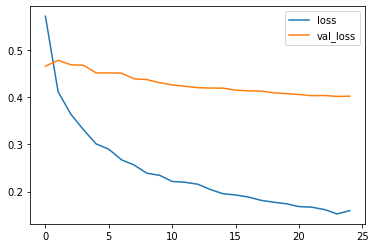

In [22]:
metrics[['loss', 'val_loss']].plot()

In [24]:
model.evaluate(X_test, y_test, verbose=0)

[0.41847304630066984, 0.85438335]

In [25]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

0

In [38]:
d_test = np.argmax(prediction, axis=1)

In [40]:
from sklearn.metrics import classification_report
#prediction = model.predict(X_test)
print(classification_report(rounded_labels, d_test))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       575
           1       0.00      0.00      0.00        98

    accuracy                           0.85       673
   macro avg       0.43      0.50      0.46       673
weighted avg       0.73      0.85      0.79       673



C:\Users\nataw\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
count = 0
for i in y_valid:
    if i[1] == 1:
        count+=1
print(count)

250
